# Task 1: Exploratory Data Analysis & Data Preprocessing
This notebook contains the exploratory data analysis and initial preprocessing for the CFPB complaint dataset.

## Objectives:
1. Load the dataset.
2. Perform EDA (Product distribution, narrative length, missingness).
3. Filter by target products.
4. Clean the complaint narratives.
5. Save the processed dataset.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.append(os.path.abspath('../src'))
from preprocessing import clean_narrative, filter_complaints, process_dataset
from eda_utils import perform_eda

# Define paths for the entire notebook
raw_data_path = '../data/raw/complaints.csv'
output_path = '../data/processed/filtered_complaints.csv'

print("Setup complete. Functions imported and paths defined.")

Setup complete. Functions imported and paths defined.


In [7]:
# Load sample for interactive EDA to save memory
print(f"Loading 20,000 row sample from {raw_data_path}...")
df_sample = pd.read_csv(raw_data_path, nrows=20000)
df_sample.head()

Loading 20,000 row sample from ../data/raw/complaints.csv...


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


--- Dataset Overview ---
Total complaints: 20000

Missing narratives:
19944 (99.72%)

Narrative length statistics:
count      56.000000
mean      244.946429
std       256.823705
min        18.000000
25%       103.000000
50%       160.500000
75%       318.750000
max      1741.000000
Name: narrative_word_count, dtype: float64


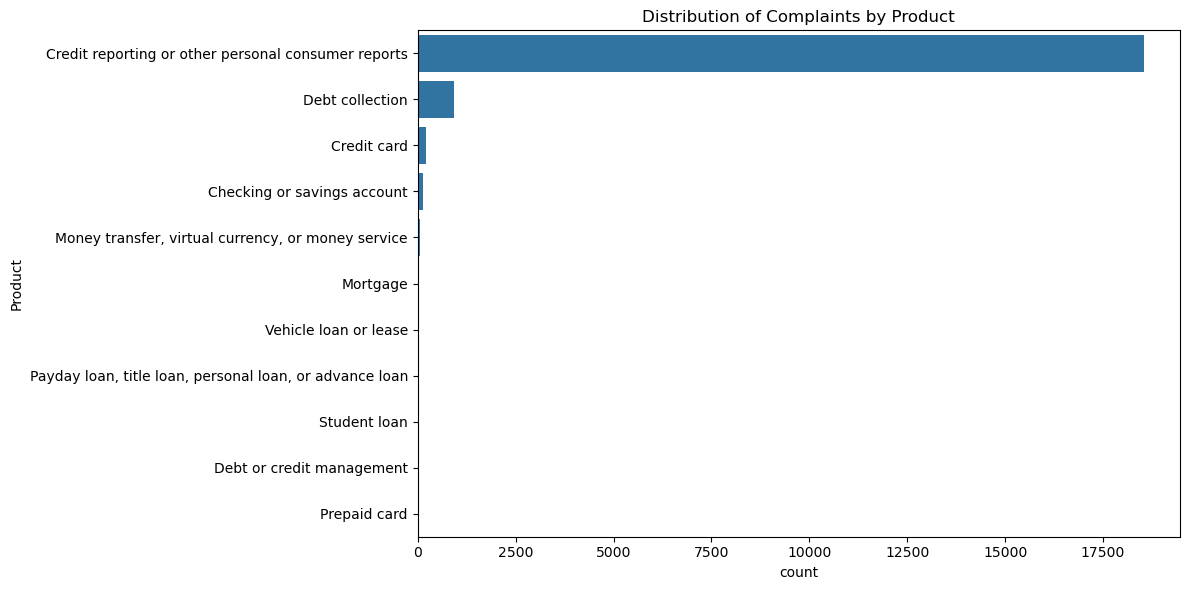

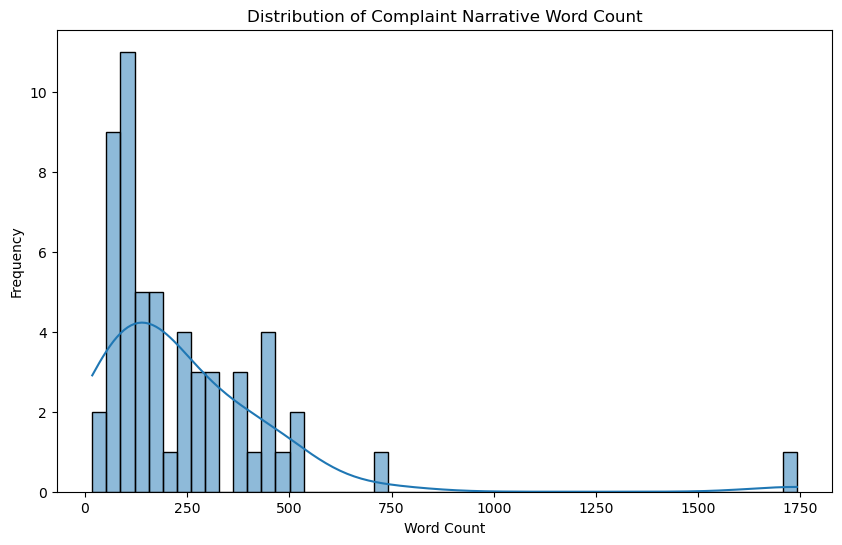

In [8]:
# Perform EDA on the sample
df_with_narratives = perform_eda(df_sample)

In [9]:
# Full Processing (using chunking for 6GB file)
print("Processing full dataset in chunks (Filtering + Cleaning)...")
if not os.path.exists('../data/processed'):
    os.makedirs('../data/processed')

processed_count = process_dataset(raw_data_path, output_path, chunk_size=100000)

print(f"\nFull processing complete. {processed_count} relevant complaints saved to {output_path}.")

print("\n--- Sample of Processed Data ---")
df_processed_sample = pd.read_csv(output_path, nrows=5)
df_processed_sample[['Product', 'Consumer complaint narrative', 'cleaned_narrative']].head()

Processing full dataset in chunks (Filtering + Cleaning)...
Processing ../data/raw/complaints.csv in chunks of 100000...
Processed 9609797 rows... (Filtered to 454472 so far)
Processing complete. Final dataset size: 454472

Full processing complete. 454472 relevant complaints saved to ../data/processed/filtered_complaints.csv.

--- Sample of Processed Data ---


,Product,Consumer complaint narrative,cleaned_narrative
0,Credit card,A XXXX XXXX card was opened under my name by a...,a xxxx xxxx card was opened under my name by a...
1,Checking or savings account,I made the mistake of using my wellsfargo debi...,i made the mistake of using my wellsfargo debi...
2,Credit card,"Dear CFPB, I have a secured credit card with c...","dear cfpb, i have a secured credit card with c..."
3,Credit card,I have a Citi rewards cards. The credit balanc...,i have a citi rewards cards. the credit balanc...
4,Credit card,b'I am writing to dispute the following charge...,bi am writing to dispute the following charges...


In [10]:
# Verification of output file
if os.path.exists(output_path):
    file_size = os.path.getsize(output_path) / (1024 * 1024)
    print(f"Processed file size: {file_size:.2f} MB")

Processed file size: 1100.56 MB


## Insights Summary
- **Product Distribution**: ...
- **Narrative Length**: ...
- **Missing Data**: ...
